# Fetal Health Classification using Machine Learning

In [1]:
# Import the Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data
Fetal_Health_Data = pd.read_csv("fetal_health.csv")
Fetal_Health_Data.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0             120          0.000             0.0                 0.000   
1             132          0.006             0.0                 0.006   
2             133          0.003             0.0                 0.008   
3             134          0.003             0.0                 0.008   
4             132          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               73                                   0.5   
1                               17                                   2.1   
2                               16                                   2.1   
3                               16                                   2.4   
4                               16                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                                 43       ...             62   
1                                                  0       ...             68   
2                                                  0       ...             68   
3                                                  0       ...             53   
4                                                  0       ...             53   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0            126                          2                           0   
1            198                          6                           1   
2            198                          5                           1   
3            170                         11                           0   
4            170                          9                           0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0             120             137               121                  73   
1             141             136               140                  12   
2             141             135               138                  13   
3             137             134               137                  13   
4             137             136               138                  11   

   histogram_tendency  fetal_health  
0                   1             2  
1                   0             1  
2                   0             1  
3                   1             1  
4                   1             1  

[5 rows x 22 columns]

In [3]:
# Fetch last 5 records
Fetal_Health_Data.tail()

baseline value  accelerations  fetal_movement  uterine_contractions  \
2121             140          0.000           0.000                 0.007   
2122             140          0.001           0.000                 0.007   
2123             140          0.001           0.000                 0.007   
2124             140          0.001           0.000                 0.006   
2125             142          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
2121                  0.0                   0.0                       0.0   
2122                  0.0                   0.0                       0.0   
2123                  0.0                   0.0                       0.0   
2124                  0.0                   0.0                       0.0   
2125                  0.0                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
2121                               79                                   0.2   
2122                               78                                   0.4   
2123                               79                                   0.4   
2124                               78                                   0.4   
2125                               74                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
2121                                                 25       ...   
2122                                                 22       ...   
2123                                                 20       ...   
2124                                                 27       ...   
2125                                                 36       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
2121            137            177                          4   
2122            103            169                          6   
2123            103            170                          5   
2124            103            169                          6   
2125            117            159                          2   

      histogram_number_of_zeroes  histogram_mode  histogram_mean  \
2121                           0             153             150   
2122                           0             152             148   
2123                           0             153             148   
2124                           0             152             147   
2125                           1             145             143   

      histogram_median  histogram_variance  histogram_tendency  fetal_health  
2121               152                   2                   0             2  
2122               151                   3                   1             2  
2123               152                   4                   1             2  
2124               151                   4                   1             2  
2125               145                   1                   0             1  

[5 rows x 22 columns]

In [4]:
# shape of the data
Fetal_Health_Data.shape

(2126, 22)

In [6]:
# Fetch the columns
Fetal_Health_Data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [9]:
# Find wether any duplicate rows are ther?
Fetal_Health_Data.duplicated().sum()

13

In [10]:
# Drop those Duplicate Rows
Fetal_Health_Data = Fetal_Health_Data.drop_duplicates()

In [12]:
# Now check the shape of the data
Fetal_Health_Data.shape

(2113, 22)

In [13]:
# Find wether any null values are present in the dat
Fetal_Health_Data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [15]:
# Fetch the base datatypes and datavalues
Fetal_Health_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   int64  
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   int64  
 8   mean_value_of_short_term_variability  

In [16]:
# Fetch the Central Tendency of Numirical data
Fetal_Health_Data.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2113.000000    2113.000000     2113.000000           2113.000000   
mean       133.304780       0.003188        0.009517              0.004387   
std          9.837451       0.003871        0.046804              0.002941   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.005000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2113.000000           2113.000000               2113.000000   
mean              0.001901              0.000003                  0.000159   
std               0.002966              0.000057                  0.000592   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2113.000000                           2113.000000   
mean                         46.993848                              1.335021   
std                          17.177782                              0.884368   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                        2113.000000       ...   
mean                                            9.795078       ...   
std                                            18.337073       ...   
min                                             0.000000       ...   
25%                                             0.000000       ...   
50%                                             0.000000       ...   
75%                                            11.000000       ...   
max                                            91.000000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2113.000000    2113.000000                2113.000000   
mean       93.564600     164.099858                   4.077142   
std        29.562269      17.945175                   2.951664   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   4.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2113.000000     2113.000000     2113.000000   
mean                     0.325603      137.454330      134.599621   
std                      0.707771       16.402026       15.610422   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

In [17]:
# Find how many unique records are there in each feature
Fetal_Health_Data.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

In [18]:
# Conclude about Traget veriable "Fetal_Health"
# Unique values
Fetal_Health_Data["fetal_health"].unique()

array([2, 1, 3], dtype=int64)

In [20]:
# Find dencity for those catagaries
Fetal_Health_Data["fetal_health"].value_counts()

1    1646
2     292
3     175
Name: fetal_health, dtype: int64

In [21]:
# Visualise
import plotly.express as px

In [22]:
fig1 = px.histogram(Fetal_Health_Data,x = "fetal_health", color="fetal_health")
fig1.show()

In [23]:
Fetal_Health_Data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [24]:
Fetal_Health_Data_cat = Fetal_Health_Data[["severe_decelerations","prolongued_decelerations",
                                         "histogram_number_of_zeroes","histogram_tendency"]]

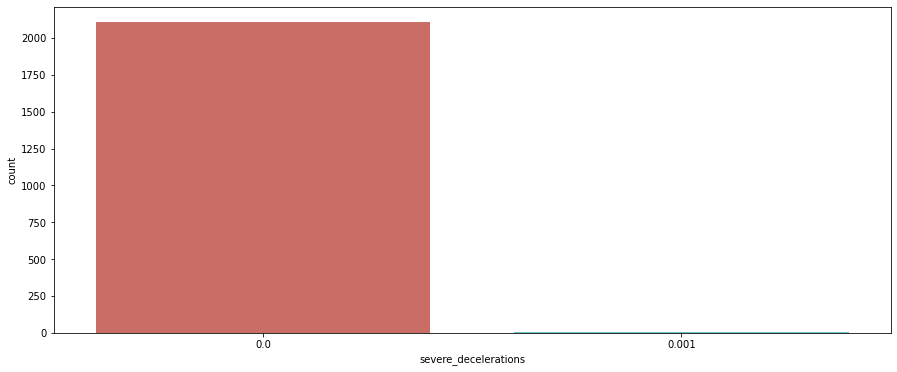

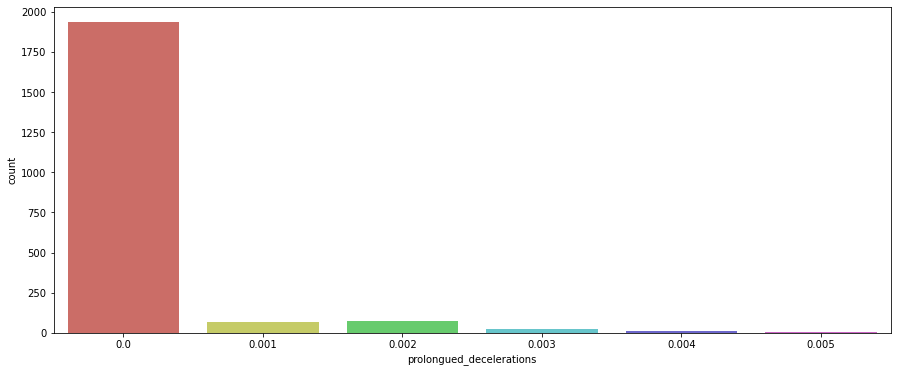

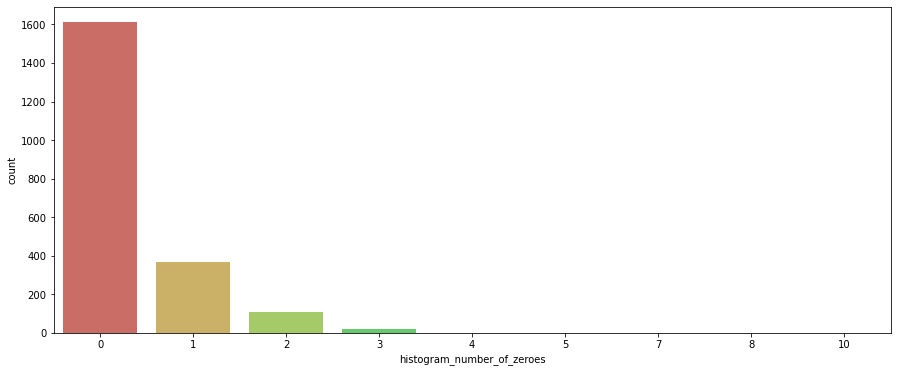

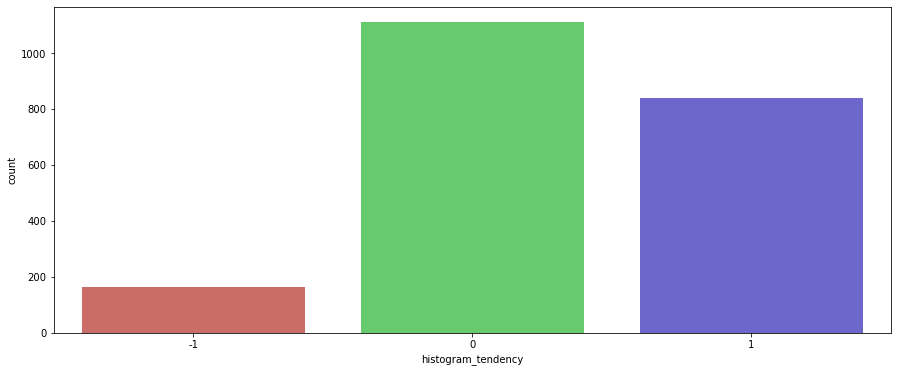

In [25]:
# Serve those Calatgorical columns
for i in Fetal_Health_Data_cat.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(Fetal_Health_Data_cat[i],data=Fetal_Health_Data_cat,
                 palette="hls")
    plt.show()

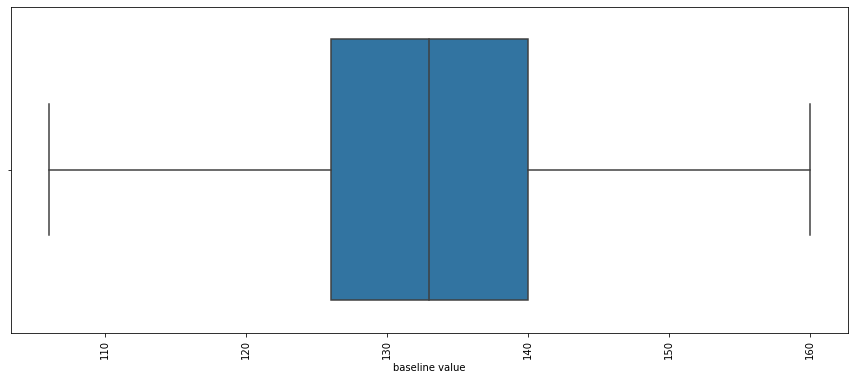

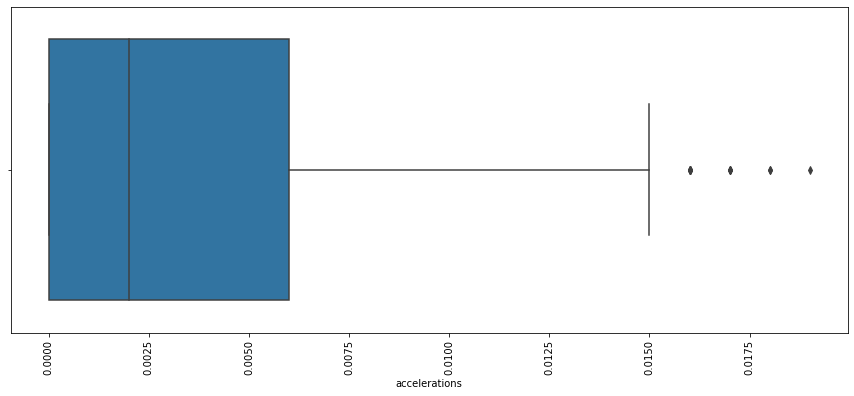

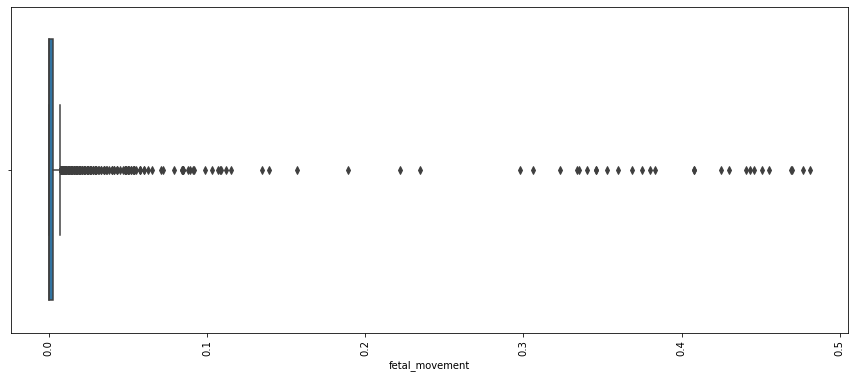

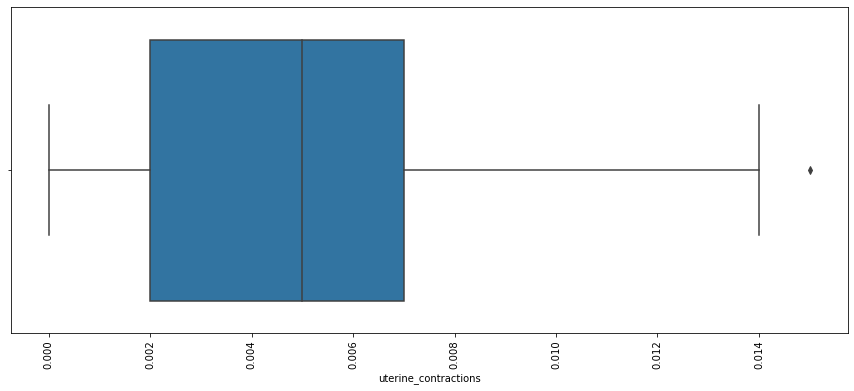

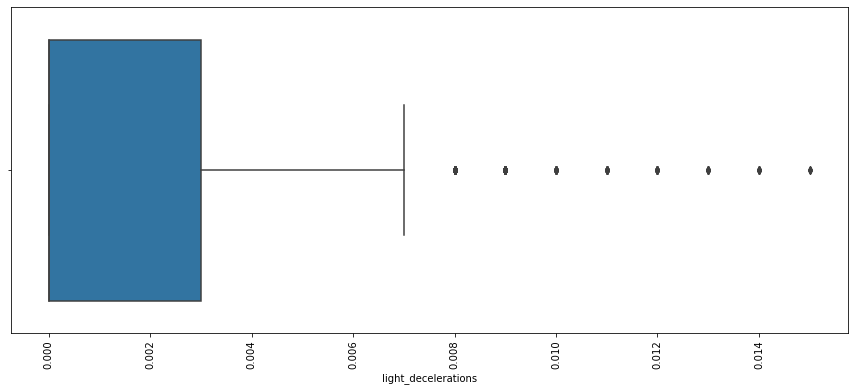

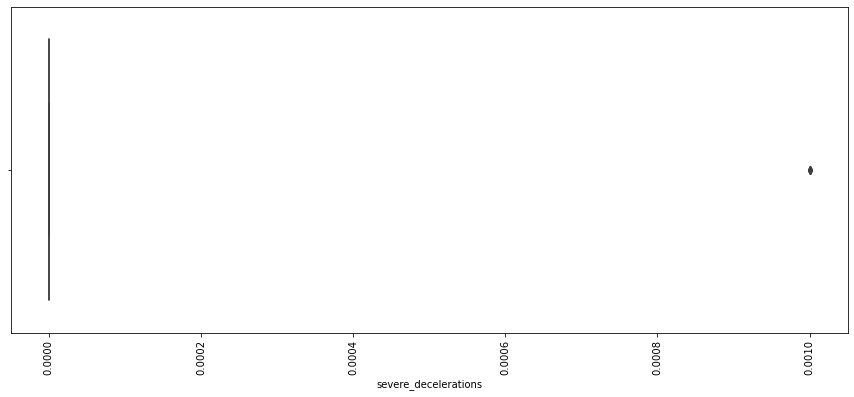

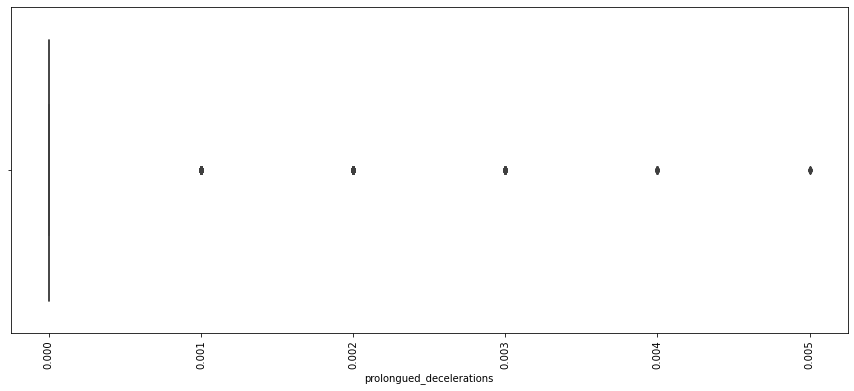

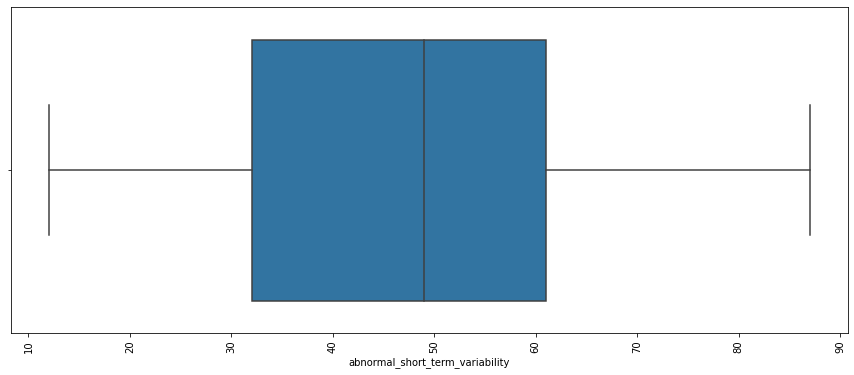

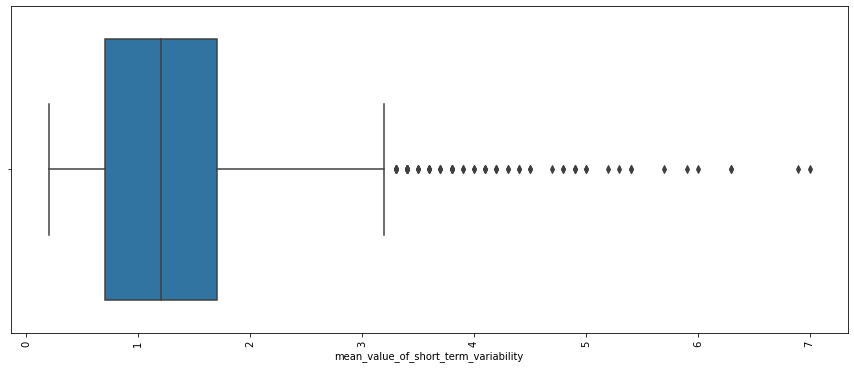

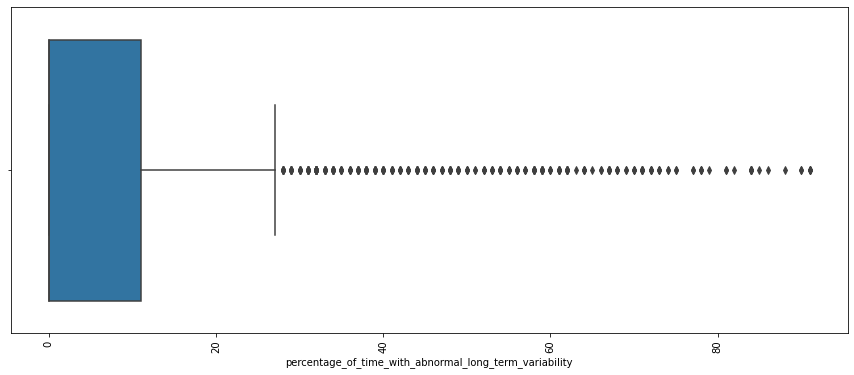

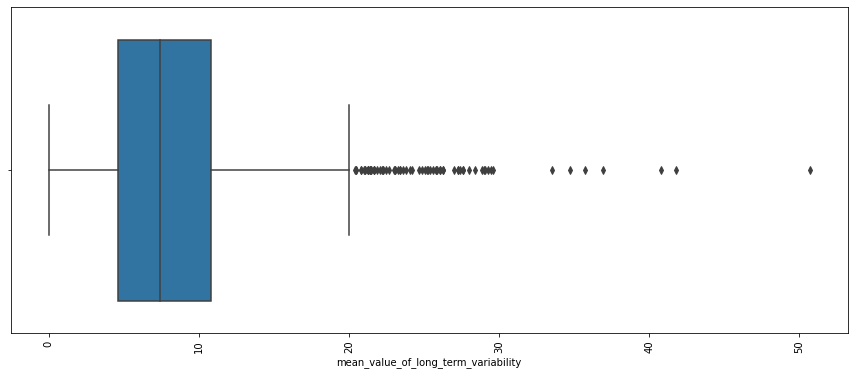

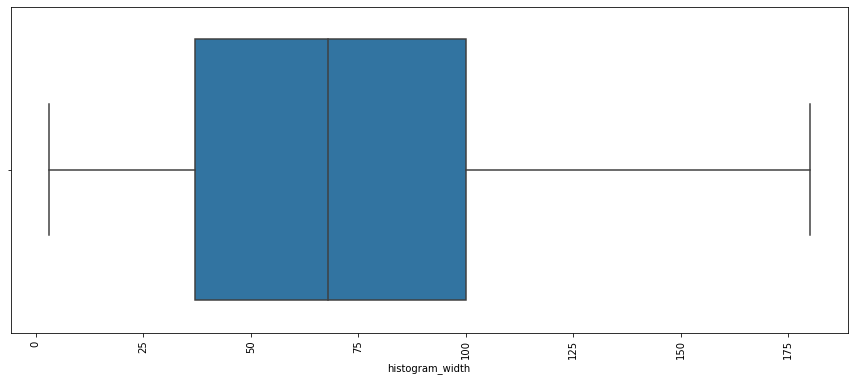

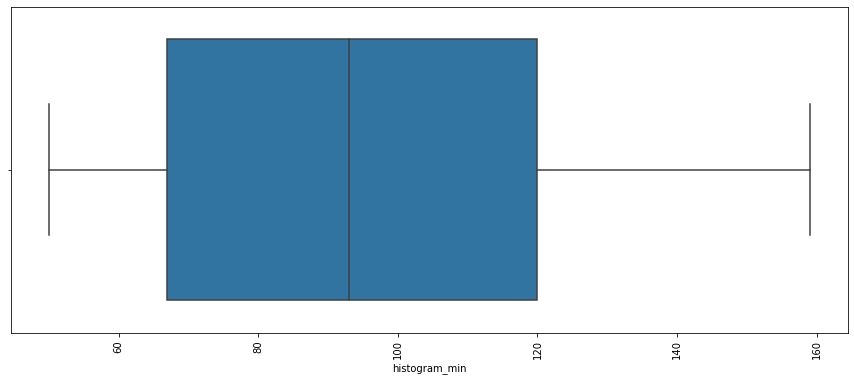

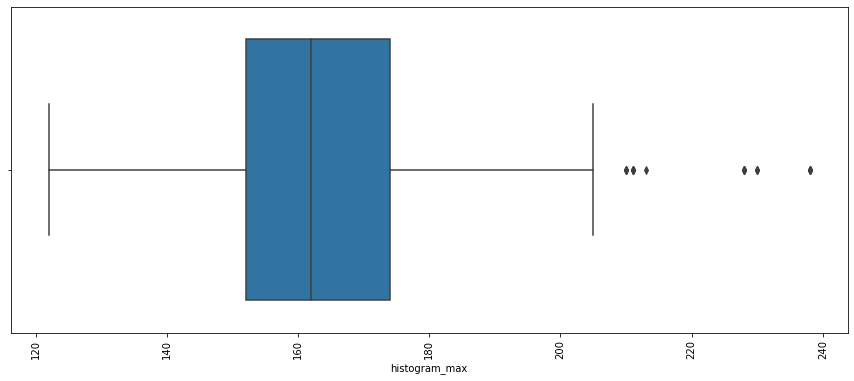

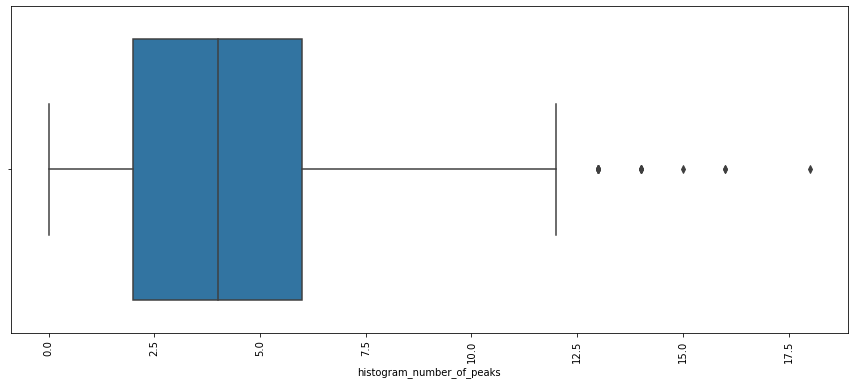

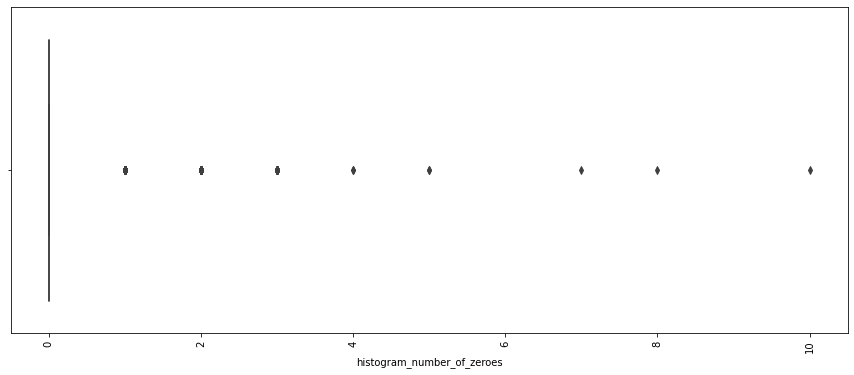

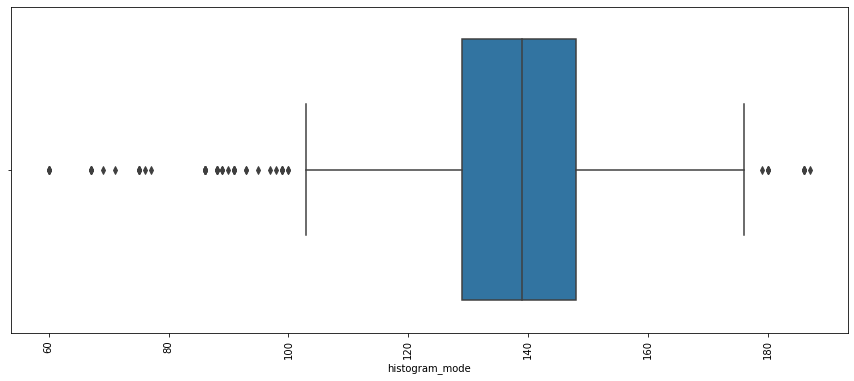

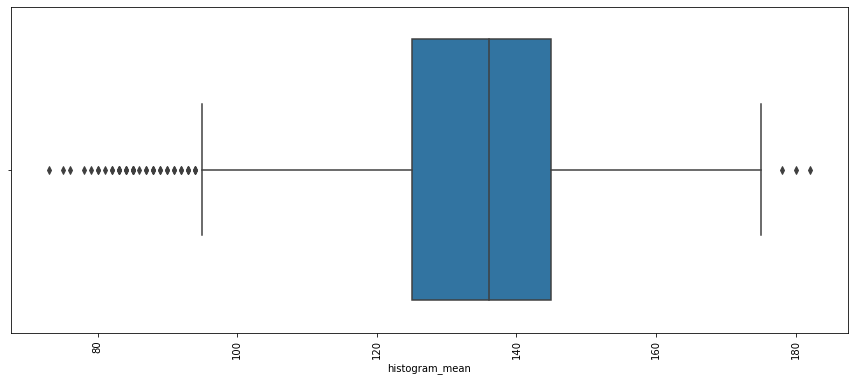

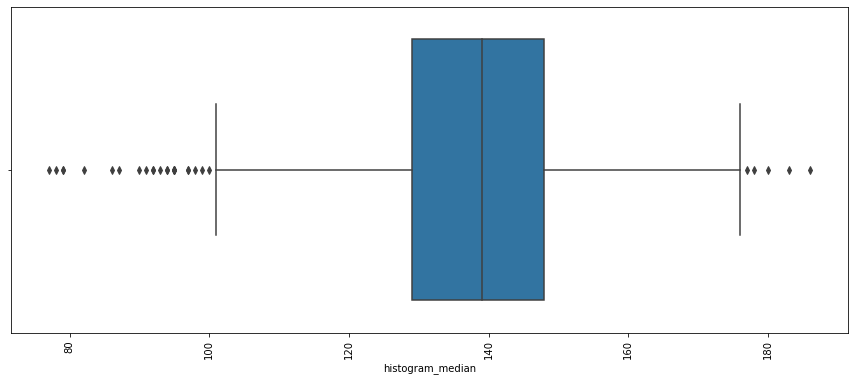

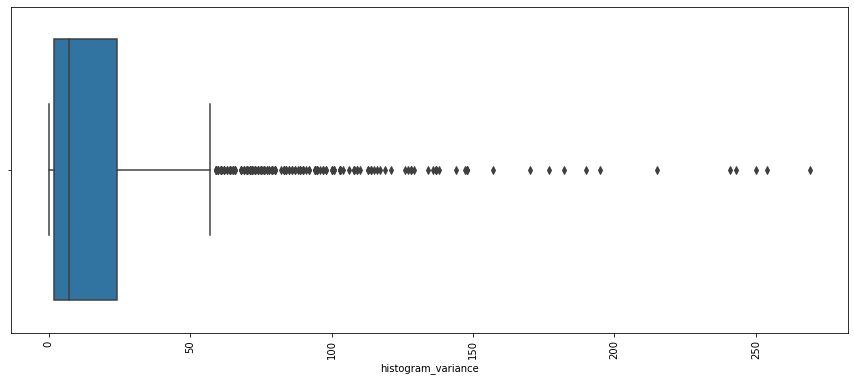

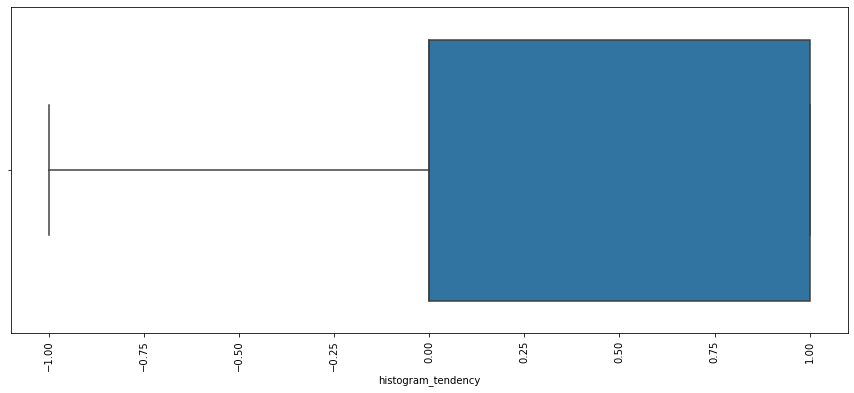

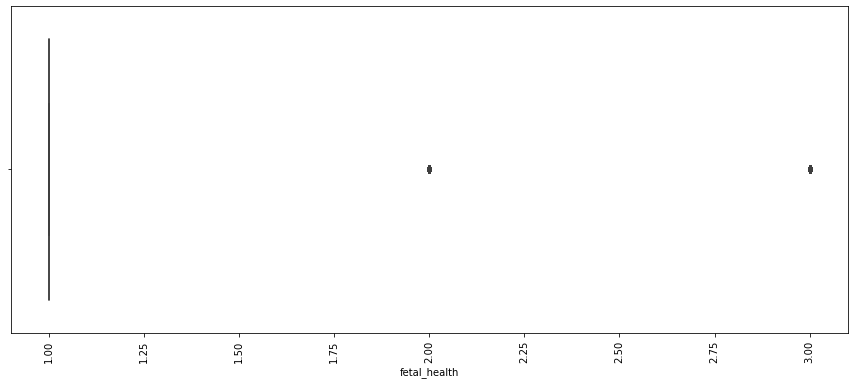

In [26]:
# Visualise Numirical datapoints
for i in Fetal_Health_Data:
    plt.figure(figsize=(15,6))
    sns.boxplot(Fetal_Health_Data[i],data=Fetal_Health_Data)
    plt.xticks(rotation = 90)
    plt.show()

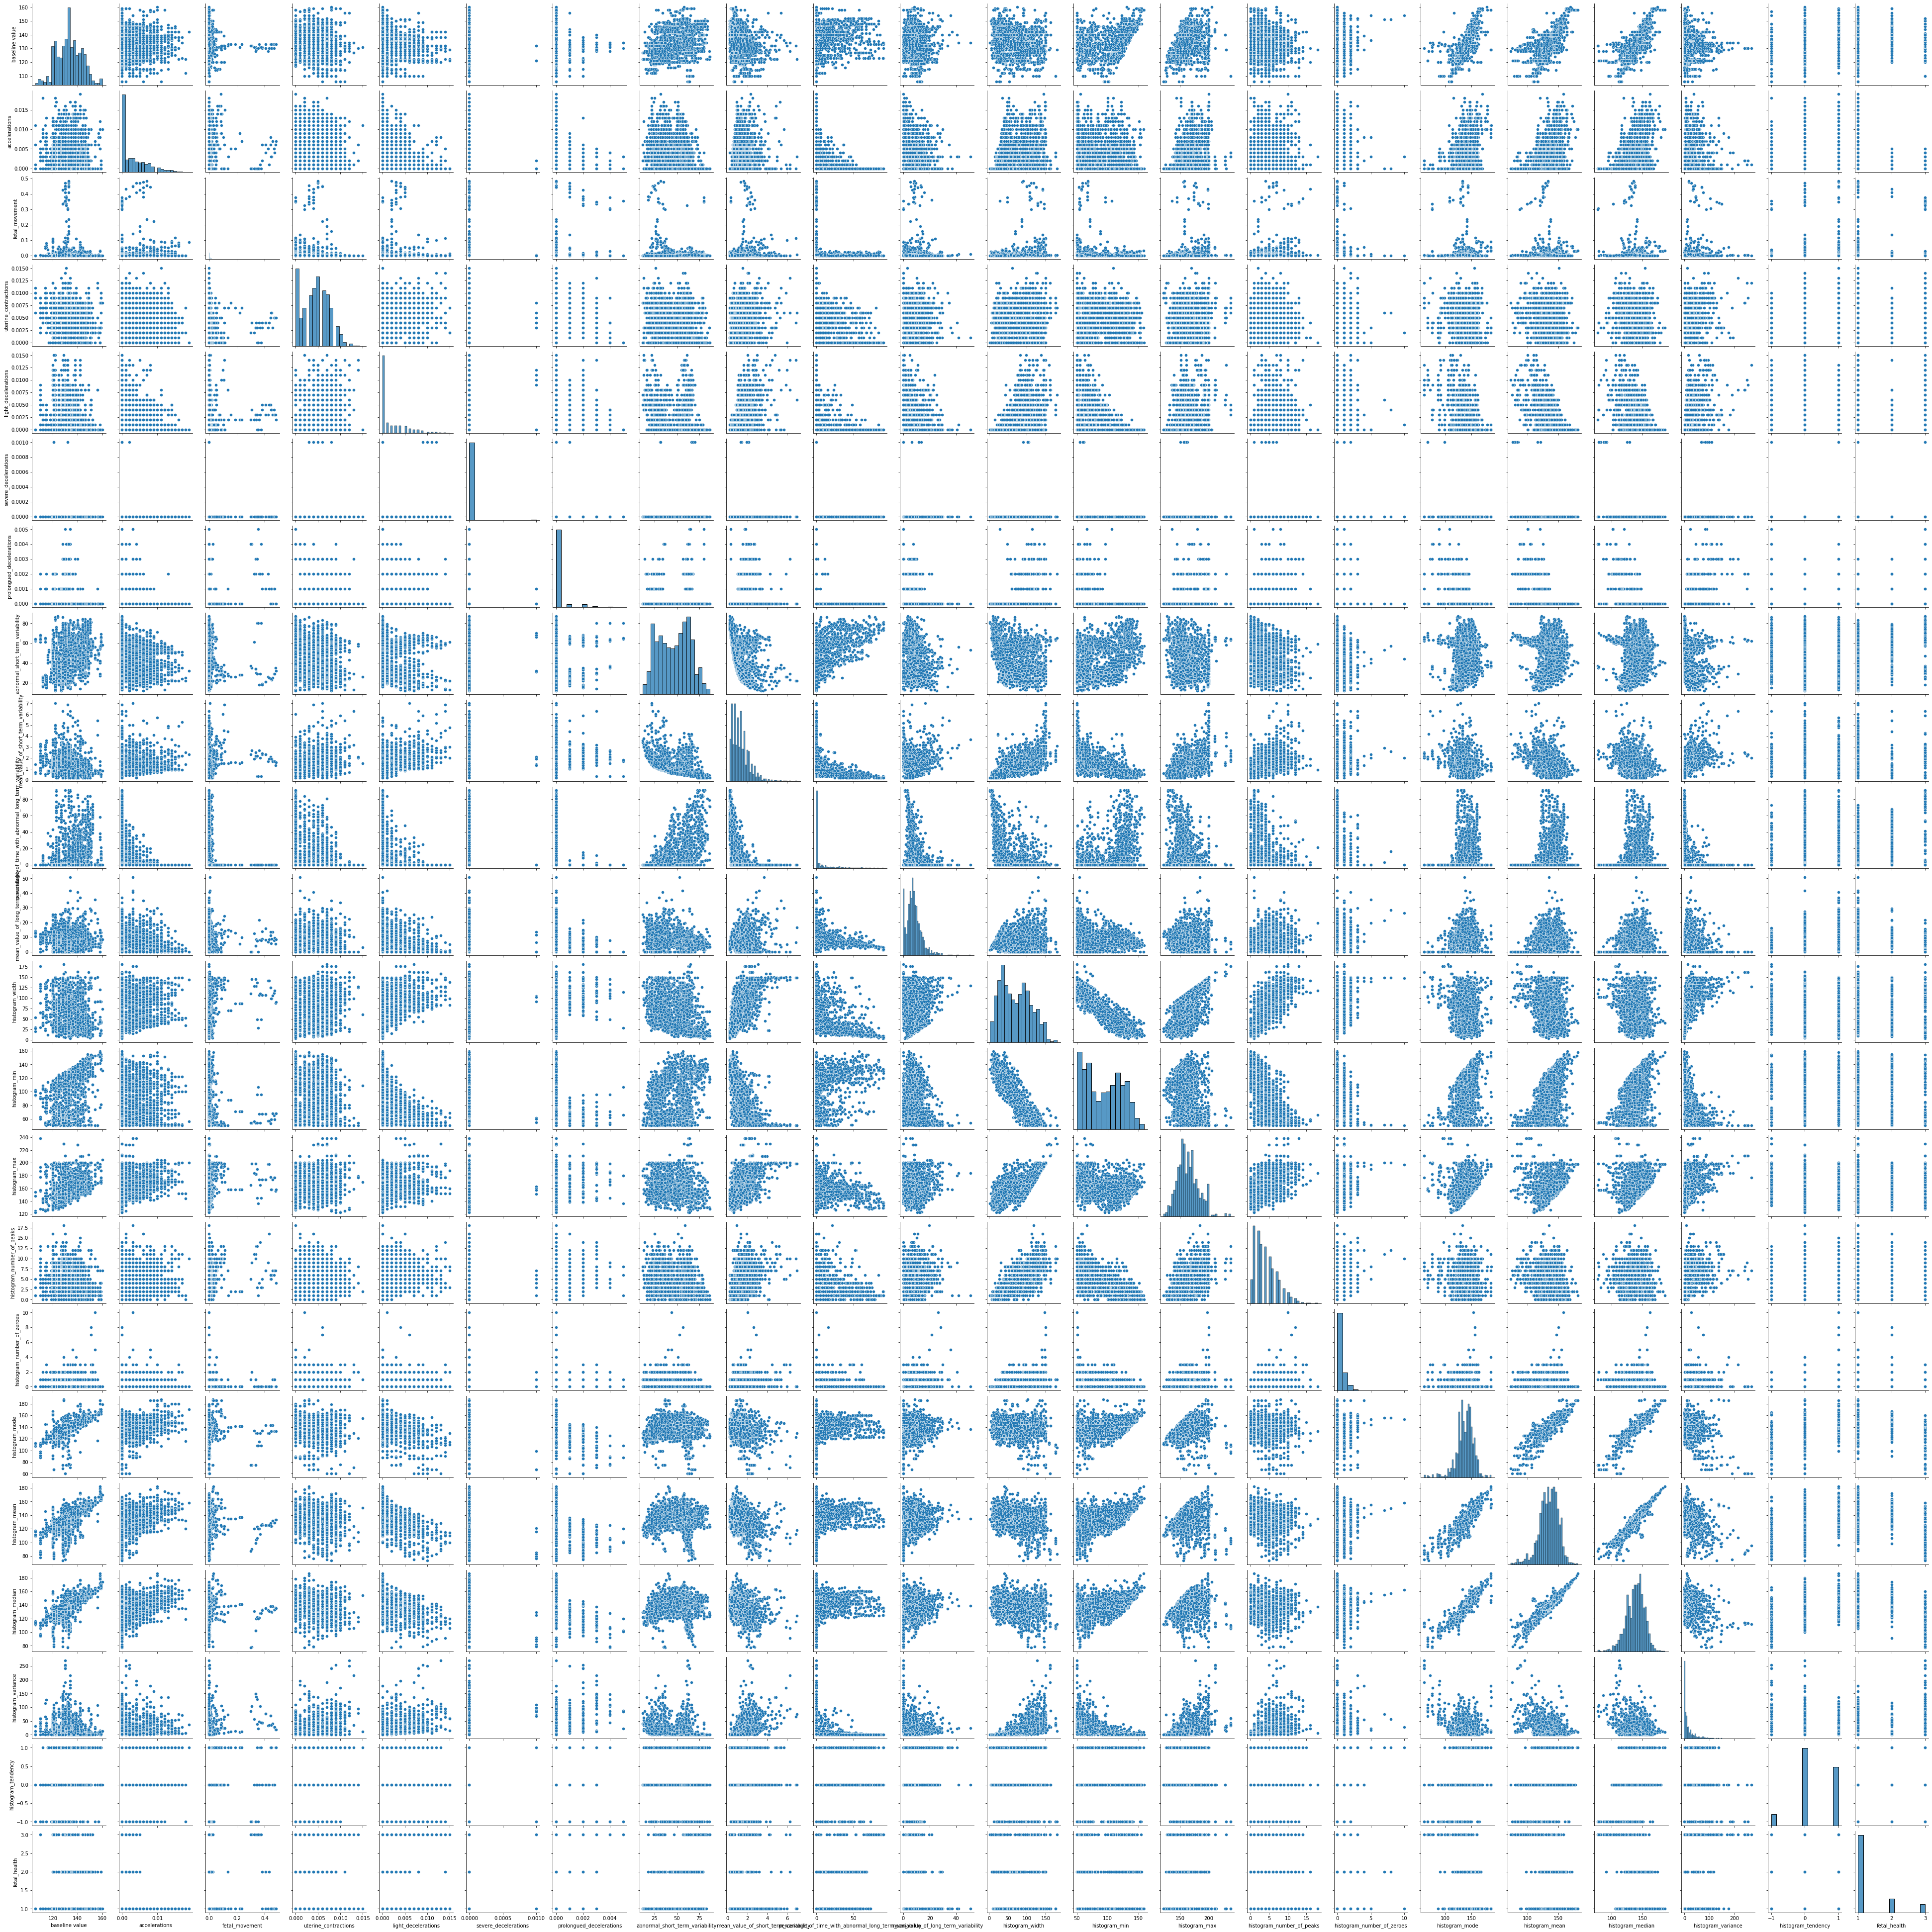

In [27]:
# visualise how all datapoints are varing 
sns.pairplot(data=Fetal_Health_Data)
plt.show()

In [28]:
# Find the Correlations
Fetal_Health_Data.corr()

baseline value  \
baseline value                                            1.000000   
accelerations                                            -0.081885   
fetal_movement                                           -0.033949   
uterine_contractions                                     -0.149587   
light_decelerations                                      -0.159836   
severe_decelerations                                     -0.053706   
prolongued_decelerations                                 -0.105003   
abnormal_short_term_variability                           0.303502   
mean_value_of_short_term_variability                     -0.278344   
percentage_of_time_with_abnormal_long_term_vari...        0.283918   
mean_value_of_long_term_variability                      -0.028901   
histogram_width                                          -0.147150   
histogram_min                                             0.360129   
histogram_max                                             0.273402   
histogram_number_of_peaks                                -0.113242   
histogram_number_of_zeroes                               -0.004807   
histogram_mode                                            0.708074   
histogram_mean                                            0.722152   
histogram_median                                          0.788487   
histogram_variance                                       -0.134458   
histogram_tendency                                        0.294412   
fetal_health                                              0.146077   

                                                    accelerations  \
baseline value                                          -0.081885   
accelerations                                            1.000000   
fetal_movement                                           0.048114   
uterine_contractions                                     0.086174   
light_decelerations                                     -0.110595   
severe_decelerations                                    -0.043237   
prolongued_decelerations                                -0.128682   
abnormal_short_term_variability                         -0.280495   
mean_value_of_short_term_variability                     0.206762   
percentage_of_time_with_abnormal_long_term_vari...      -0.373507   
mean_value_of_long_term_variability                     -0.141413   
histogram_width                                          0.298350   
histogram_min                                           -0.155306   
histogram_max                                            0.392684   
histogram_number_of_peaks                                0.189209   
histogram_number_of_zeroes                              -0.007360   
histogram_mode                                           0.243083   
histogram_mean                                           0.270266   
histogram_median                                         0.272507   
histogram_variance                                       0.124433   
histogram_tendency                                       0.030670   
fetal_health                                            -0.363947   

                                                    fetal_movement  \
baseline value                                           -0.033949   
accelerations                                             0.048114   
fetal_movement                                            1.000000   
uterine_contractions                                     -0.069867   
light_decelerations                                       0.048795   
severe_decelerations                                     -0.011022   
prolongued_decelerations                                  0.265802   
abnormal_short_term_variability                          -0.104876   
mean_value_of_short_term_variability                      0.121532   
percentage_of_time_with_abnormal_long_term_vari...       -0.074900   
mean_value_of_long_term_variability                       0.011749   
histogram_wid

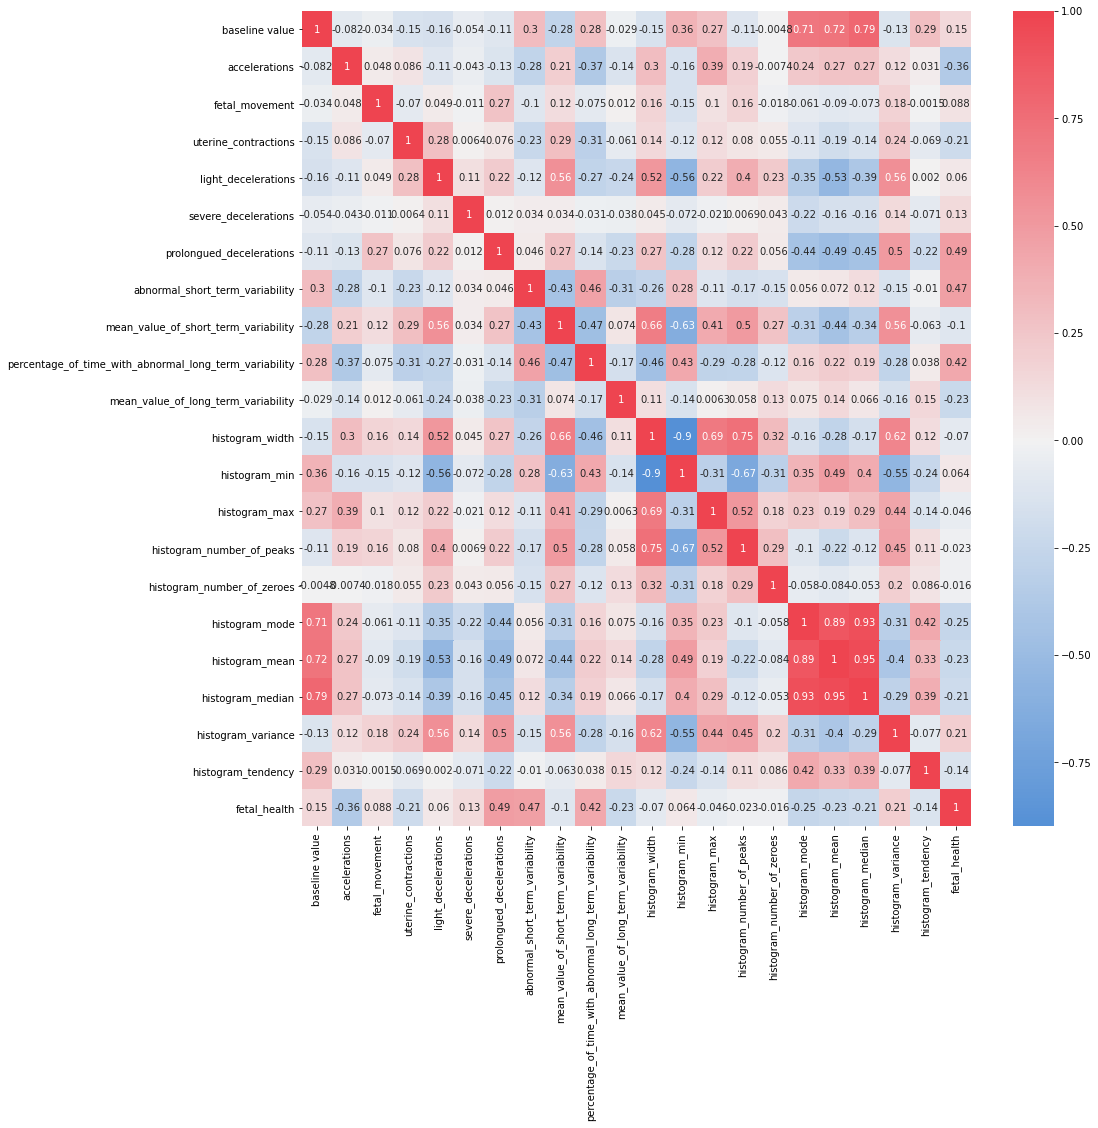

In [29]:
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(250,10,s = 80,l = 55,n = 9, as_cmap=True)
sns.heatmap(Fetal_Health_Data.corr(),annot=True,cmap=cmap,center=0)
plt.show()

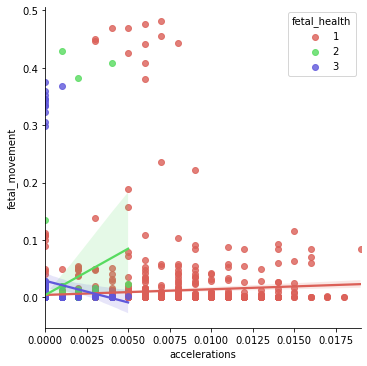

In [32]:
sns.lmplot(data=Fetal_Health_Data, x ="accelerations", y ="fetal_movement",palette="hls",hue="fetal_health",legend_out=False)
plt.show()

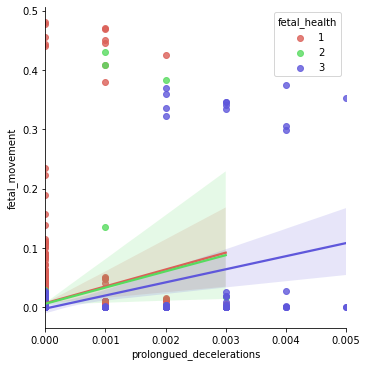

In [33]:
sns.lmplot(data=Fetal_Health_Data, x ="prolongued_decelerations", y ="fetal_movement",palette="hls",hue="fetal_health",legend_out=False)
plt.show()

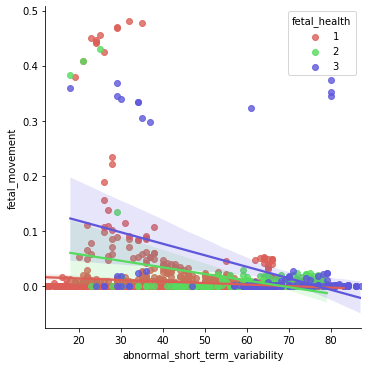

In [35]:
sns.lmplot(data=Fetal_Health_Data, x ="abnormal_short_term_variability", y ="fetal_movement",palette="hls",hue="fetal_health",legend_out=False)
plt.show()

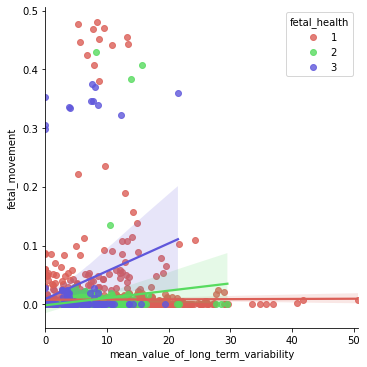

In [36]:
sns.lmplot(data=Fetal_Health_Data, x ="mean_value_of_long_term_variability", y ="fetal_movement",palette="hls",hue="fetal_health",legend_out=False)
plt.show()

In [38]:
Fetal_Health_Data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [39]:
Fetal_Health_Data_col = ['baseline value', 'accelerations', 'fetal_movement','uterine_contractions', 'light_decelerations', 'severe_decelerations',
                         'prolongued_decelerations', 'abnormal_short_term_variability','percentage_of_time_with_abnormal_long_term_variability',
                         'mean_value_of_long_term_variability']

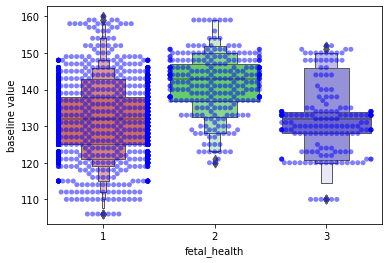

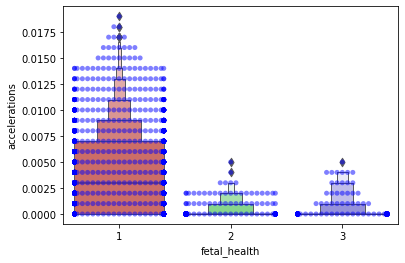

KeyboardInterrupt: 

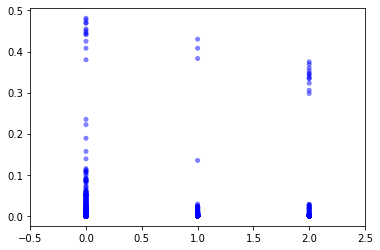

In [44]:
for i in Fetal_Health_Data_col:
    sns.swarmplot(x = Fetal_Health_Data["fetal_health"], y = Fetal_Health_Data[i],color="blue",alpha = 0.5)
    sns.boxenplot(x = Fetal_Health_Data["fetal_health"], y = Fetal_Health_Data[i],palette="hls")
    plt.show()

In [ ]:
plt.figure(figsize = (20,10))
sns.boxenplot(data = Fetal_Health_Data,palette="hls")
plt.xticks(rotation = 90)
plt.show()

In [45]:
# Prepair Model Building packages
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,auc
np.random.seed(0)

In [46]:
# Prepair Depandant and indepandant veriabls
x = Fetal_Health_Data.drop(["fetal_health"],axis=1)
y = Fetal_Health_Data["fetal_health"]

In [47]:
# Check authanticty
x.shape

(2113, 21)

In [48]:
y.shape

(2113,)

In [49]:
# Scale the data
col_names = list(x.columns)
s_scaler = StandardScaler()
x_df = s_scaler.fit_transform(x)
x_df = pd.DataFrame(x_df,columns=col_names)
x_df.describe().T

count          mean  \
baseline value                                      2113.0 -5.880031e-16   
accelerations                                       2113.0  9.678328e-17   
fetal_movement                                      2113.0 -8.588072e-16   
uterine_contractions                                2113.0 -1.629763e-15   
light_decelerations                                 2113.0 -6.120886e-15   
severe_decelerations                                2113.0 -5.337596e-16   
prolongued_decelerations                            2113.0  2.528818e-15   
abnormal_short_term_variability                     2113.0  6.567812e-17   
mean_value_of_short_term_variability                2113.0 -3.913365e-16   
percentage_of_time_with_abnormal_long_term_vari...  2113.0  2.212985e-15   
mean_value_of_long_term_variability                 2113.0  5.146538e-16   
histogram_width                                     2113.0 -7.035441e-17   
histogram_min                                       2113.0  1.420224e-16   
histogram_max                                       2113.0  4.979715e-16   
histogram_number_of_peaks                           2113.0  8.256003e-16   
histogram_number_of_zeroes                          2113.0  2.103802e-16   
histogram_mode                                      2113.0 -3.792255e-16   
histogram_mean                                      2113.0  7.585035e-16   
histogram_median                                    2113.0  9.018920e-16   
histogram_variance                                  2113.0 -3.865026e-16   
histogram_tendency                                  2113.0  5.717149e-16   

                                                         std       min  \
baseline value                                      1.000237 -2.776252   
accelerations                                       1.000237 -0.823776   
fetal_movement                                      1.000237 -0.203392   
uterine_contractions                                1.000237 -1.492245   
light_decelerations                                 1.000237 -0.641203   
severe_decelerations                                1.000237 -0.057653   
prolongued_decelerations                            1.000237 -0.269640   
abnormal_short_term_variability                     1.000237 -2.037640   
mean_value_of_short_term_variability                1.000237 -1.283731   
percentage_of_time_with_abnormal_long_term_vari...  1.000237 -0.534294   
mean_value_of_long_term_variability                 1.000237 -1.450150   
histogram_width                                     1.000237 -1.731741   
histogram_min                                       1.000237 -1.474004   
histogram_max                                       1.000237 -2.346582   
histogram_number_of_peaks                           1.000237 -1.381629   
histogram_number_of_zeroes                          1.000237 -0.460150   
histogram_mode                                      1.000237 -4.723360   
histogram_mean                                      1.000237 -3.946992   
histogram_median                                    1.000237 -4.220187   
histogram_variance                                  1.000237 -0.651258   
histogram_tendency                                  1.000237 -2.158193   

                                                         25%       50%  \
baseline value                                     -0.742724 -0.030989   
accelerations                                      -0.823776 -0.307036   
fetal_movement                                     -0.203392 -0.203392   
uterine_contractions                               -0.811961  0.208464   
light_decelerations                                -0.641203 -0.641203   
severe_decelerations                               -0.057653 -0.057653   
prolongued_decelerations                           -0.269640 -0.269640   
abnormal_short_term_variability                    -0.873069  0.116815   
mean_value_of_short_term_variability               -0.718221 -0.152712   
percentage_

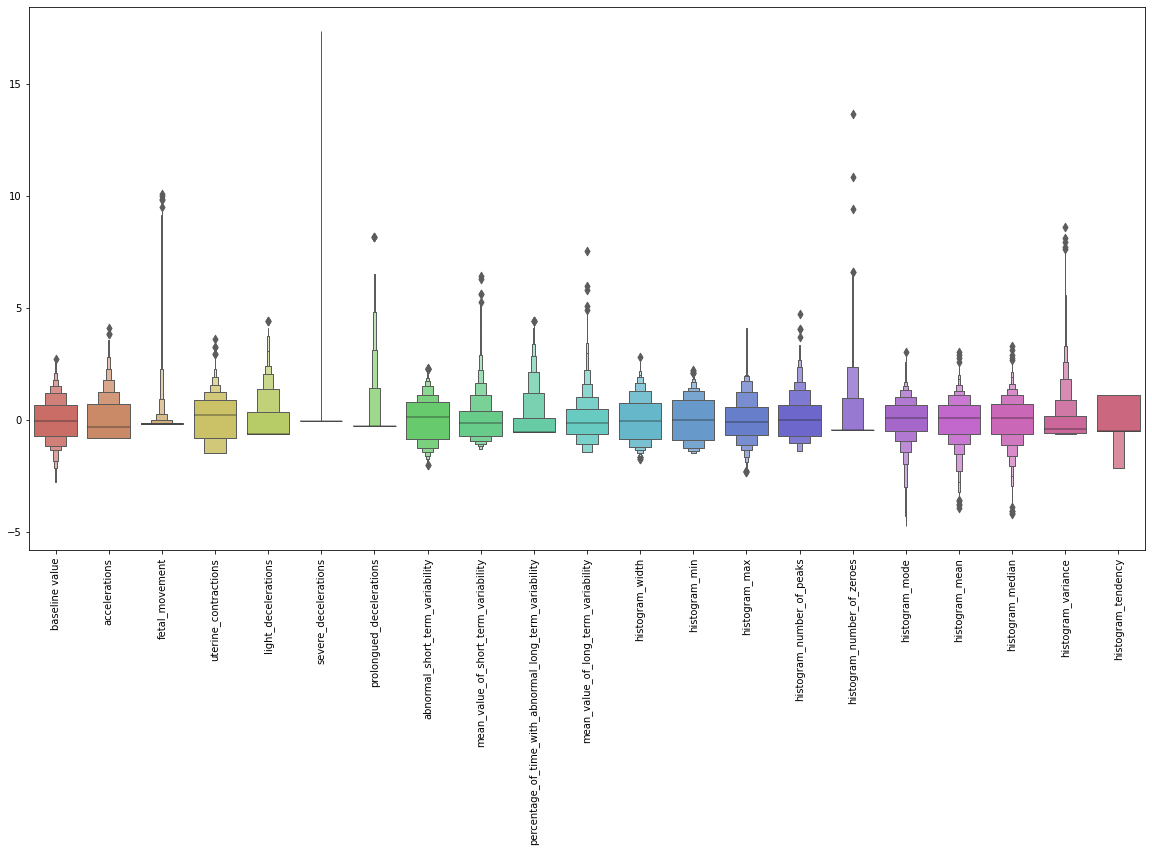

In [50]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=x_df,palette="hls")
plt.xticks(rotation =90)
plt.show()

In [51]:
# Split The data
x_train, x_test, y_train, y_test = train_test_split(x_df,y,test_size = 0.2,random_state = 42)

In [52]:
# Setup all the model using pipeline
pipeline_lr = Pipeline([("lr_classifier",LogisticRegression(random_state = 42))])
pipeline_dt = Pipeline([("dt_classifier",DecisionTreeClassifier(random_state = 42))])
pipeline_rf = Pipeline([("rf_classifier",RandomForestClassifier())])
pipeline_svc = Pipeline([("sv_classifier",SVC())])
pipelines = [pipeline_lr,pipeline_dt,pipeline_rf,pipeline_svc]
pipe_dict = {0:'Logistic Regression',1:'Decision Tree',2:'Random Forest',3:'SVC'}

In [53]:
# Setup the model
for pipe in pipelines:
    pipe.fit(x_train,y_train)
    

In [57]:
# Evaluate The Model
# Accurecy
cv_resuls_accurecy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train, y_train,cv=10)
    cv_resuls_accurecy.append(cv_score)
    print("%s: %f " % (pipe_dict[i],cv_score.mean()))

Logistic Regression: 0.887574 
Decision Tree: 0.915385 
Random Forest: 0.937278 
SVC: 0.904734 


In [58]:
# Predict using Random Forest
predict_rfc = pipeline_rf.predict(x_test)

In [59]:
# Print testing and training accurecy of Random Forest model
print("Training Accurecy: ",pipeline_rf.score(x_train,y_train))
print("Testing Accurecy: ",pipeline_rf.score(x_test,y_test))

Training Accurecy:  0.9994082840236687
Testing Accurecy:  0.966903073286052


In [60]:
from sklearn.metrics import accuracy_score

In [61]:
print("Classification report for classification Pipelines %s: \n %s: \n" % (pipeline_rf,
                                                                           metrics.classification_report(y_test,predict_rfc)))

Classification report for classification Pipelines Pipeline(steps=[('rf_classifier', RandomForestClassifier())]): 
               precision    recall  f1-score   support

           1       0.97      0.99      0.98       341
           2       0.93      0.80      0.86        54
           3       1.00      1.00      1.00        28

    accuracy                           0.97       423
   macro avg       0.97      0.93      0.95       423
weighted avg       0.97      0.97      0.97       423
: 



In [62]:
# Draw the Confusion Metrix
metrix = confusion_matrix(y_test,predict_rfc)
print("Confusion Metrix :  \n",metrix)

Confusion Metrix :  
 [[338   3   0]
 [ 11  43   0]
 [  0   0  28]]


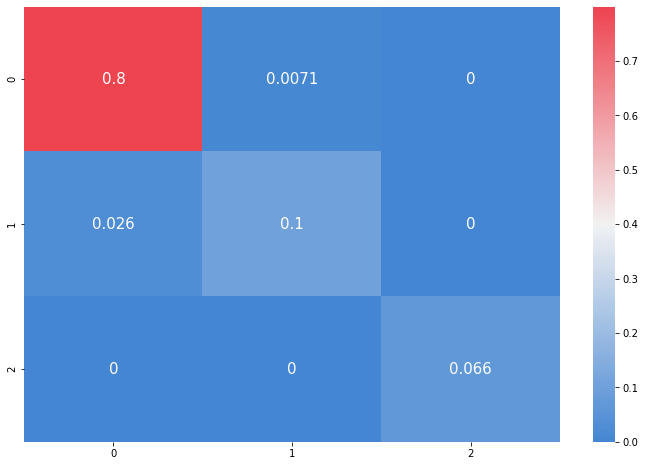

In [65]:
# Plot the metrix
plt.figure(figsize = (12,8))
sns.heatmap(metrix/np.sum(metrix),cmap=cmap, annot=True, annot_kws={'size':15})
plt.show()

# Continue Learning